# Web Scraping Job Vacancies

## Introduction

In this project, we'll build a web scraper to extract job listings from a popular job search platform. We'll extract job titles, companies, locations, job descriptions, and other relevant information.

Here are the main steps we'll follow in this project:

1. Setup our development environment
2. Understand the basics of web scraping
3. Analyze the website structure of our job search platform
4. Write the Python code to extract job data from our job search platform
5. Save the data to a CSV file
6. Test our web scraper and refine our code as needed

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and HTML structure. In addition, you may want to use the following packages in your Python environment:

- requests
- BeautifulSoup
- csv
- datetime

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install requests`
- `!pip install BeautifulSoup`

## Step 1: Import Required Libraries

In [19]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
import time

## Step 2: Analyze the Website Structure

1. Visit the URL: https://www.jobs.ch/en/vacancies/?location=zurich&term=data%20analyst.
2. Inspect the page (right-click → Inspect) to understand the HTML structure.
3. Identify the tags and classes for job titles, companies, locations, and descriptions.

For jobs.ch:

1. Job titles are usually in "h2" tags.
2. Company names and locations are often in "span" or "div" tags.
3. Job descriptions might be in "div" tags with specific classes.

## Step 3: Write Python Code to Extract Job Data

In [5]:
# Define the URL of the job search page
base_url = "https://www.jobs.ch/en/vacancies/?term=data%20analyst&page="
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Initialize a list to store all job data
all_jobs = []

In [9]:
page = 1
max_pages = 15  # Set a maximum page limit
while page <= max_pages:
    # Construct the URL for the current page
    url = base_url + str(page)
    print(f"Fetching page {page}: {url}")
    
    # Fetch the HTML content
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the parent div containing all job cards
    job_listings = soup.find('div', class_='d_grid gap_s16 ov_hidden p_s8 pb_s16')
    
    # Check if the parent div was found
    if not job_listings:
        print(f"No job listings found on page {page}. Stopping pagination.")
        break
    
    # Find all child divs (job cards) inside the parent div
    job_cards = job_listings.find_all('div', recursive=False)  # Use recursive=False to get only direct children
    
    # Print the number of job cards found on the current page
    print(f"Number of job cards found on page {page}: {len(job_cards)}")
    
    # Extract job details from each job card
    for job in job_cards:
        # Extract job title
        title_tag = job.find('span', class_='mb_s4 mr_s8 textStyle_h4 wb_break-word ov_hidden tov_ellipsis d_-webkit-box hy_auto ov-wrap_break-word white-space_normal word-wrap_break-word box-orient_vertical lc_4')
        title = title_tag.text.strip() if title_tag else "No title available"
        
        # Extract company name
        company_tag = job.find('p', class_='mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90')
        company = company_tag.text.strip() if company_tag else "No company available"
        
        # Extract job location
        location_tag = job.find('p', class_='mb_s12 lastOfType:mb_s0 textStyle_p2')
        location = location_tag.text.strip() if location_tag else "No location available"
        
        # Append the job details to the list
        all_jobs.append({
            'Title': title,
            'Company': company,
            'Location': location
        })
    
    # Check if there is a "Next" button for pagination
    next_button = soup.find('a', attrs={
        'class': 'cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited d_inline-flex bdr_r32 color-palette_link.brand',
        'data-cy': 'paginator-next'
    })
    
    if not next_button:
        print("No more pages found. Stopping pagination.")
        break
    
    # Increment the page number
    page += 1
    
    # Add a delay to avoid overwhelming the server
    time.sleep(2)

Fetching page 1: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=1
Number of job cards found on page 1: 24
Fetching page 2: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=2
Number of job cards found on page 2: 22
Fetching page 3: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=3
Number of job cards found on page 3: 21
Fetching page 4: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=4
Number of job cards found on page 4: 22
Fetching page 5: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=5
Number of job cards found on page 5: 22
Fetching page 6: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=6
Number of job cards found on page 6: 22
Fetching page 7: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=7
Number of job cards found on page 7: 22
Fetching page 8: https://www.jobs.ch/en/vacancies/?term=data%20analyst&page=8
Number of job cards found on page 8: 22
Fetching page 9: https://www.jobs.ch/en/vacancies/?term=

In [10]:
# Convert the list of all jobs to a pandas DataFrame
df = pd.DataFrame(all_jobs)

# Display the DataFrame as a table
print(df)

                                                 Title  \
0                                   No title available   
1           Werkstudent/in Data Engineer Analyst (50%)   
2                                  Data Analyst (100%)   
3                                   No title available   
4                                  Senior Data Analyst   
..                                                 ...   
306  Berufseinstieg Praktikant/in Audit & Assurance...   
307                         Presales Services (gn) AWS   
308  Senior Business Engineer Private Client Manage...   
309                                 No title available   
310                                 No title available   

                       Company               Location  
0                Telus Digital             Homeoffice  
1                 Swissgrid AG                  Aarau  
2        Bank CIC (Schweiz) AG                  Basel  
3         No company available  No location available  
4        Bulgari Horlog

## Step 4: Save the Data to a CSV File

Now that we’ve extracted the data, let’s save it to a CSV file for further analysis.

In [25]:
# Write the data to a CSV file
df.to_csv('all_job_listings.csv', index=False)
print("All job listings saved to 'all_job_listings.csv'.")

All job listings saved to 'all_job_listings.csv'.


## Step 5: Test and Refine the Code

1. Run the code and check the output CSV file to ensure it contains the expected data.
2. If the website has pagination (multiple pages of job listings), modify the code to loop through all pages. For example:

In [ ]:
base_url = "https://www.jobs.ch/en/vacancies/?term=data%20analyst"
jobs = []

# Loop through the first 5 pages (adjust as needed)
for page in range(1, 6):  # Scrape pages 1 to 5
    url = base_url + str(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    job_listings = soup.find_all('div', class_='d_flex bg-c_brand.01 bdr_r16 flex-d_column h_100% p_s16 pos_relative')
    
    for job in job_listings:
        title = job.find('span', class_='c_gray.90 mb_s4 mr_s8 textStyle_h4 wb_break-word ov_hidden tov_ellipsis d_-webkit-box hy_auto ov-wrap_break-word white-space_normal word-wrap_break-word box-orient_vertical lc_4').text.strip()
        company = job.find('p', class_='mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90').text.strip()
        location = job.find('p', class_='mb_s12 lastOfType:mb_s0 textStyle_p2').text.strip()
        
        jobs.append({
            'Title': title,
            'Company': company,
            'Location': location
        })

# Save the updated data to a CSV file
filename = f"job_postings_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
with open(filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['Title', 'Company', 'Location'])
    writer.writeheader()
    writer.writerows(jobs)

print(f"Data saved to {filename}")

## Step 6: Analyze and Visualize the

Once the data is saved, you can analyze it using libraries like pandas and matplotlib. For example:

                                        Title                Company  \
0                          No title available          Telus Digital   
1  Werkstudent/in Data Engineer Analyst (50%)           Swissgrid AG   
2                         Data Analyst (100%)  Bank CIC (Schweiz) AG   
3                          No title available   No company available   
4                         Senior Data Analyst  Bulgari Horlogerie SA   

                Location  
0             Homeoffice  
1                  Aarau  
2                  Basel  
3  No location available  
4              Neuchâtel  


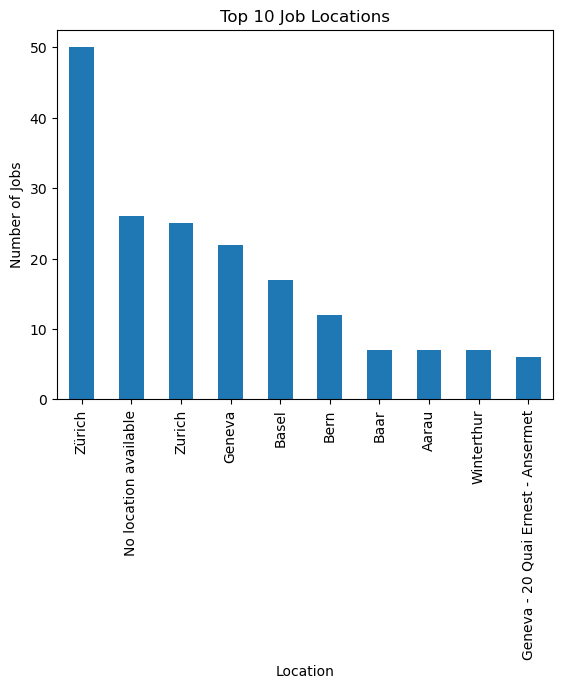

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('all_job_listings.csv')

# Display the first few rows
print(df.head())

# Analyze job locations
location_counts = df['Location'].value_counts()

# Plot the top 10 locations
location_counts.head(10).plot(kind='bar', title='Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.show()

## Step 7: Share Insights and Recommendations

Based on the analysis, you can draw insights such as:
- Most common job titles.
- Top companies hiring for data analysts in Zurich.
- Geographic distribution of job opportunities.

Recommendations:
- Focus on the most frequent job titles and locations to prioritize sourcing efforts.
- Use the scraped data to build a database for future reference.
- Automate the scraping process to run daily and update the CSV file.

### 1. Load the Data

In [33]:
import pandas as pd

# Display the first few rows of the DataFrame
print(df.head())

                                        Title                Company  \
0                          No title available          Telus Digital   
1  Werkstudent/in Data Engineer Analyst (50%)           Swissgrid AG   
2                         Data Analyst (100%)  Bank CIC (Schweiz) AG   
3                          No title available   No company available   
4                         Senior Data Analyst  Bulgari Horlogerie SA   

                Location  
0             Homeoffice  
1                  Aarau  
2                  Basel  
3  No location available  
4              Neuchâtel  


### 2. Analyze Job Titles

Insight:
The most common job titles (e.g., "Data Analyst," "Junior Data Analyst") can help the recruitment agency focus on the most in-demand roles.

Top 10 Job Titles:
Title
No title available                                                          41
Business Analyst Public                                                      5
(Senior) Data Science & Data Analytics Consultant 60-100%                    4
Werkstudent/in Data Engineer Analyst (50%)                                   3
Financial Analyst                                                            2
Senior Java Developer                                                        2
Senior Consultant (w/m) Data & Intelligence Delivery (DID) for Assurance     2
Business Analyst - Valuation                                                 2
Data Engineer                                                                2
Technical Business Analyst - Client Reporting                                2
Name: count, dtype: int64


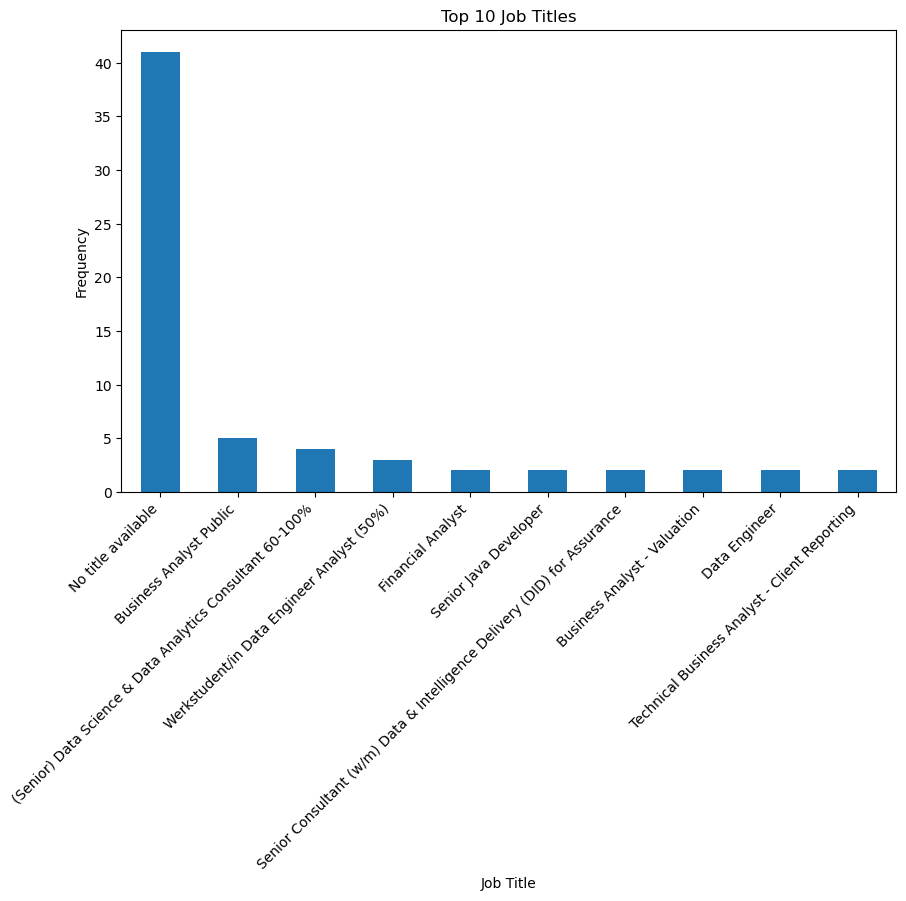

In [36]:
# Count the frequency of each job title
title_counts = df['Title'].value_counts()

# Display the top 10 job titles
print("Top 10 Job Titles:")
print(title_counts.head(10))

# Plot the top 10 job titles
title_counts.head(10).plot(kind='bar', title='Top 10 Job Titles', figsize=(10, 6))
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


### 3. Analyze Companies

Insight:
The top companies (e.g., "Company A," "Company B") are the most active in hiring data analysts. The recruitment agency can prioritize building relationships with these companies.

Top 10 Companies Hiring:
Company
No company available                   27
Eraneos Switzerland AG                 10
Accenture                               9
Dentsu International Switzerland AG     8
MSC Cruises SA                          7
F. Hoffmann-La Roche AG                 7
LGT Capital Partners AG                 6
Ernst & Young AG                        6
Akros AG                                5
Bison Schweiz AG                        4
Name: count, dtype: int64


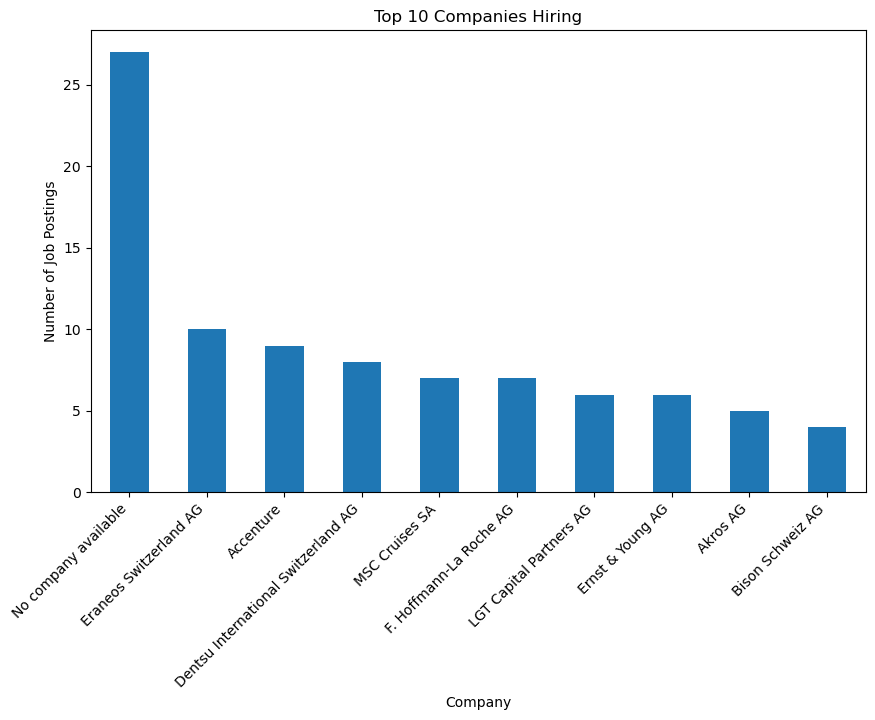

In [39]:
# Count the frequency of each company
company_counts = df['Company'].value_counts()

# Display the top 10 companies
print("Top 10 Companies Hiring:")
print(company_counts.head(10))

# Plot the top 10 companies
company_counts.head(10).plot(kind='bar', title='Top 10 Companies Hiring', figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4. Analyze Locations

Insight:
Most job postings are concentrated in specific locations (e.g., Zurich, Basel). The recruitment agency can focus its efforts on these areas.

Top 10 Job Locations:
Location
Zürich                                50
No location available                 26
Zurich                                25
Geneva                                22
Basel                                 17
Bern                                  12
Baar                                   7
Aarau                                  7
Winterthur                             7
Geneva - 20 Quai Ernest - Ansermet     6
Name: count, dtype: int64


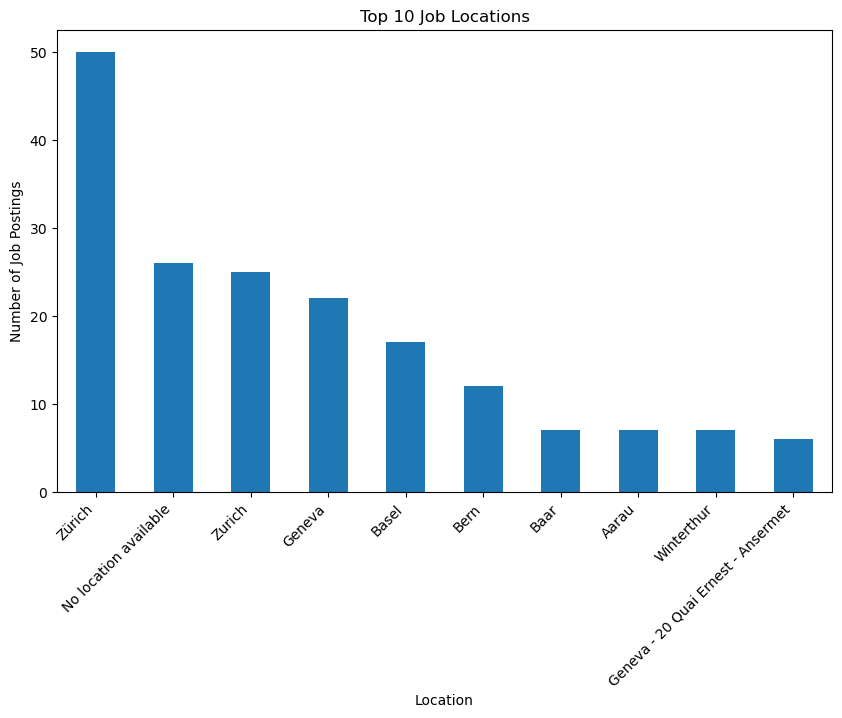

In [42]:
# Count the frequency of each location
location_counts = df['Location'].value_counts()

# Display the top 10 locations
print("Top 10 Job Locations:")
print(location_counts.head(10))

# Plot the top 10 locations
location_counts.head(10).plot(kind='bar', title='Top 10 Job Locations', figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()